# Ultimate Inc. Take Home Challenge
This notebook walks through the solutions for take home challenge by Ultimate Inc.

## Part 1 - Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime
plt.rcParams['figure.figsize']=(15,8)
%matplotlib inline

In [2]:
file = pd.read_json(r'C:\Users\eshai\Downloads\1481053515_ultimate_challenge\ultimate_challenge\logins.json')

In [3]:
file = file.set_index('login_time')
file['# logins'] = 1

In [4]:
def custom_plot(df, axis, title, y_label=''):
    """
    Arguments:
    df: A dataframe
    axis: location of subplot
    title: title of subplot
    y_label: y label of subplot
    """
    plt.subplot(axis)
    plt.plot(df['# logins'])
    plt.ylabel(y_label)
    plt.title(title)
    plt.rcParams['figure.figsize']=(15,8)
    plt.tight_layout()

In [5]:
def resample(df, interval):
    """
    Takes a dataframe and time interval to resample into
    
    Returns resampled dataframe
    """
    # resample the dataframe 
    temp_resample = df.resample(interval).count()
    return temp_resample

In [6]:
#resampling
min15 = resample(file, '15Min')
min30 = resample(file, '30Min')
hourly = resample(file, '60Min')
daily = resample(file, 'D')
biweek = resample(file, '2W')

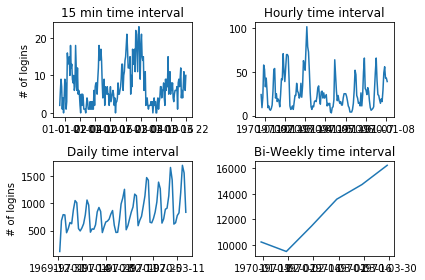

In [7]:
# 15 Min
custom_plot(min15[:200], 221, "15 min time interval", "# of logins")
# Hourly
custom_plot(hourly[:150], 222, "Hourly time interval")
# Daily
custom_plot(daily[:75], 223, "Daily time interval", "# of logins")
# Monthly
custom_plot(biweek[1:7], 224, "Bi-Weekly time interval")
plt.show()

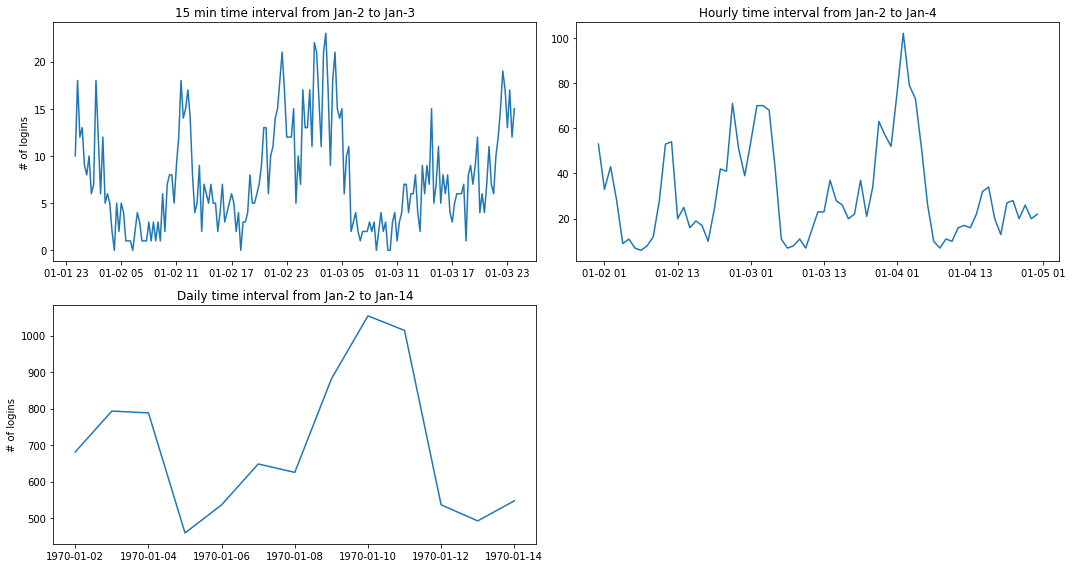

In [8]:
# 15 Min
custom_plot(min15[16:208], 221, "15 min time interval from Jan-2 to Jan-3", "# of logins")
# Hourly
custom_plot(hourly[4:77], 222, "Hourly time interval from Jan-2 to Jan-4")
# Daily
custom_plot(daily[1:14], 223, "Daily time interval from Jan-2 to Jan-14", "# of logins")

plt.show()

In [9]:
# auto-correlation between numerous intervals and its lag:
print('======Correlation between 15min, 15min lag(previous 15min)=====')
print(pd.DataFrame({'actual': min15['# logins'], 'lag': min15['# logins'].shift()}).corr())
print('======Correlation between 30min, 30min lag(previous 30min)=====')
print(pd.DataFrame({'actual': min30['# logins'], 'lag': min30['# logins'].shift()}).corr())
print('======Correlation between 1HR, 1HR lag(previous 1HR)=====')
print(pd.DataFrame({'actual': hourly['# logins'], 'lag': hourly['# logins'].shift()}).corr())
print('======Correlation between 1Day, 1Day lag(previous Day)=====')
print(pd.DataFrame({'actual': daily['# logins'], 'lag': daily['# logins'].shift()}).corr())


======Correlation between 15min, 15min lag(previous 15min)=====
        actual     lag
actual  1.0000  0.8307
lag     0.8307  1.0000
======Correlation between 30min, 30min lag(previous 30min)=====
          actual       lag
actual  1.000000  0.854976
lag     0.854976  1.000000
======Correlation between 1HR, 1HR lag(previous 1HR)=====
          actual       lag
actual  1.000000  0.809281
lag     0.809281  1.000000
======Correlation between 1Day, 1Day lag(previous Day)=====
          actual       lag
actual  1.000000  0.563481
lag     0.563481  1.000000


The number of logins has a hourly pattern of increased logins at night and slight jumps around the typical lunch hours. Looking at the time series on a daily basis shows a dramatic up and down pattern through the series data. Ultimately the trend through the 4 months is positive. When trying to predict time interval, predicting 30 min intervals works best.

## Part 2 - Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
   * a. how you will implement the experiment
   * b. what statistical test(s) you will conduct to verify the significance of the observation
   * c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

 Activity should be sufficient metric to measure success. If reimbursing all toll cost is sufficiant incentive for driver to serve both cities, we should see increased activity in tolls. Ideally we would only track the activity of partner driver and not other drivers.

 I would suggest creating a number of distinct week long event for drivers to recieve reimbursed toll cost and track the toll activity during the events. Then test the validity of this change using a t-test. If the test proves that proves reimburing all toll cost promotes activity in both cities. I would suggest that the city operations team look at the cost related to implement this type of change. Ultimately we want to ensure that this change leads to increase revenue for Ultimate inc.

## Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a fewsentences/plots describing your approach will suffice). What fraction of the observed users were retained?
    * Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 
    * Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model
      Include any key indicators of model performance.
    * Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention(again, a few sentences will suffice). 

In [10]:
file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()
data=json.loads(file_content)
df=pd.DataFrame(data)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


A quick summary of the information in the dataframe shows some missing values and feature variables that need to be transformed.

In [12]:
# Change dtype float to datetime:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [13]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
avg_rating_of_driver,8122,0.16244
phone,396,0.00792
avg_rating_by_driver,201,0.00402
weekday_pct,0,0.00000
ultimate_black_user,0,0.00000
trips_in_first_30_days,0,0.00000
surge_pct,0,0.00000
signup_date,0,0.00000
last_trip_date,0,0.00000
city,0,0.00000


The above dataframe shows missing data within the dataset. Since only a small portion of the data is missing, i will drop all observation that have any incomplete records.

In [14]:
#Drop all oberservation with missing values
data = df.dropna().reset_index(drop=True)
data2 = data.copy()
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
# get the most recent trip date
from_day = max(data['last_trip_date'])
# 30 days preciding the last trip date
days = [from_day - datetime.timedelta(days=x) for x in range(0, 30)]
# map functin to check if user is active in last 30 days
data['retention'] = data['last_trip_date'].map(lambda x: int(x in days))



In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# encode categorical variables:
le = LabelEncoder()

data['ultimate_black_user'] = data['ultimate_black_user'].astype('int')

data["Phone"] = le.fit_transform(data["phone"])
data["City"] = le.fit_transform(data["city"])

data = data.drop(['phone','city'], axis=1)

data['active'] = ((data['last_trip_date'] - data['signup_date']) / np.timedelta64(1, 'M')).map(lambda x: 1 if x > 5 else 0)

In [18]:
# Identify ratio of retained users:
frac_ret = len(data[data['retention'] == 1])/len(data)
print("Fraction of users retained: " + str(frac_ret))

Fraction of users retained: 0.40072385088671736


About 40 percent of users were retained a

In [19]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention,Phone,City,active
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,1,1,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,0,1,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,1,1,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,2,0


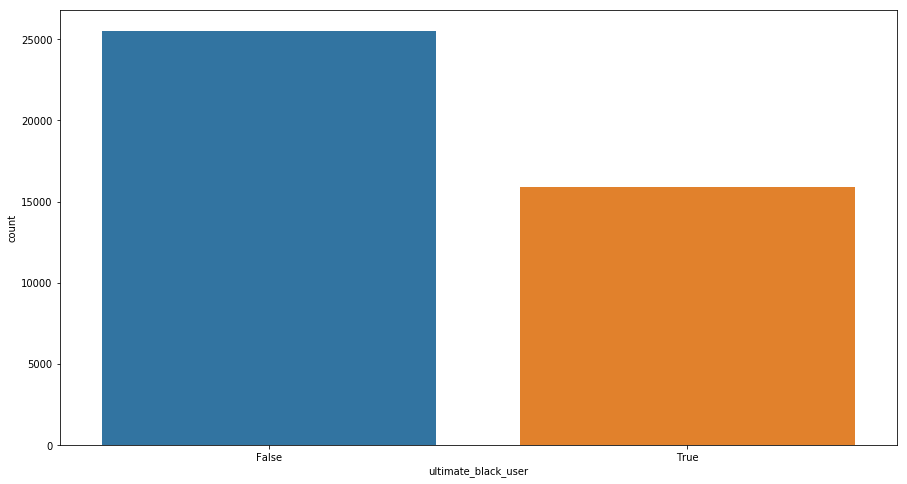

In [20]:
sns.countplot(x=data2['ultimate_black_user'])
plt.show()

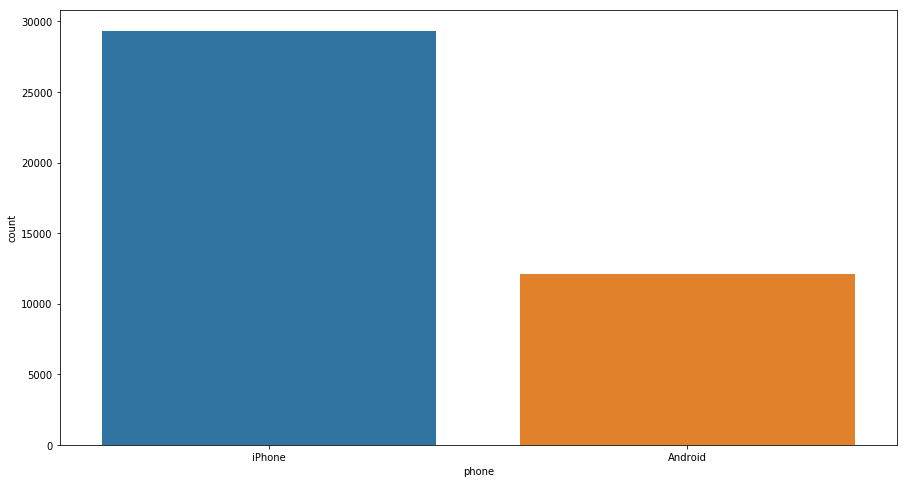

In [21]:
sns.countplot(x=data2['phone'])
plt.show()

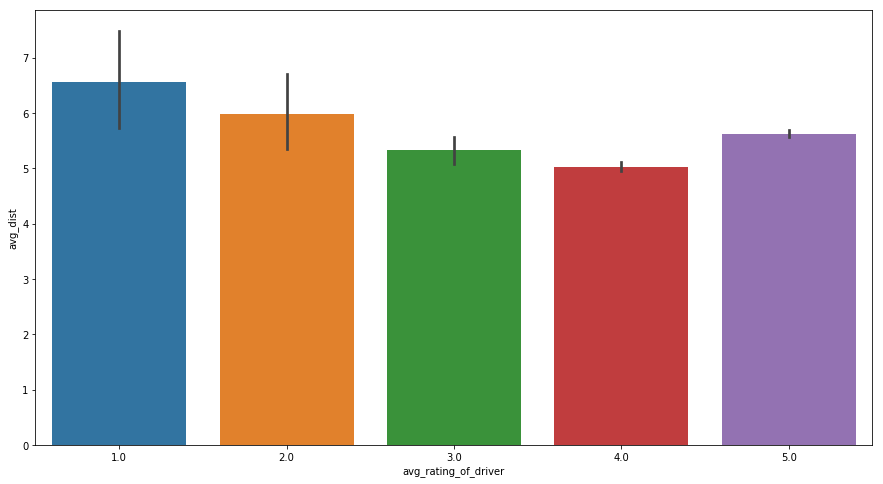

In [22]:
sns.barplot(y='avg_dist', x=round(data['avg_rating_of_driver'],0), data=data2)

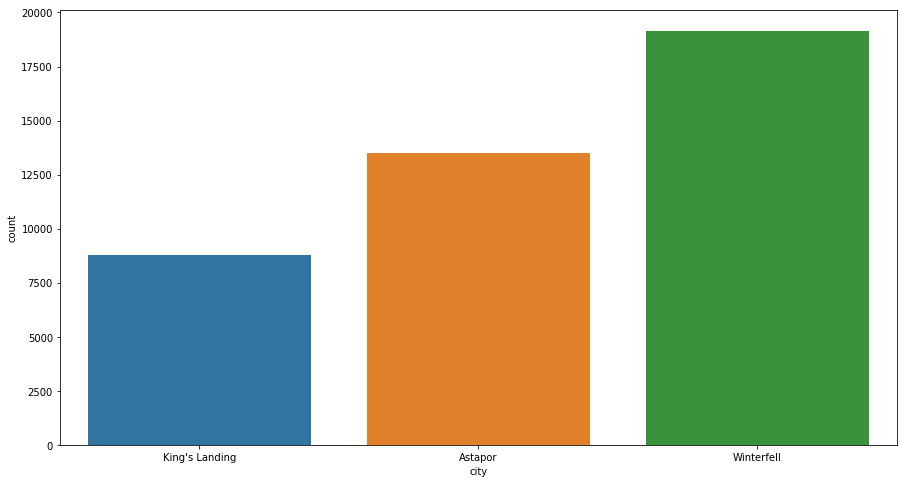

In [23]:
sns.countplot(x=data2['city'])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV

I plan to use a logistic regression model to for this classification problem. To evaluate the model, I will use f1 score and accuracy metric. Both metrics describe the model prediction power. 

In [25]:
# split predictor and target variables into Train and test sets
x = data.drop(['active', 'avg_surge', 'last_trip_date', 'signup_date'], axis=1)
y = data['active']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=4, test_size=.1)

In [26]:
# Model built using logistic regression algorithm:

# Setup the hyperparameter grid
c_space = [.0001,0.001, 0.1, 1, 10, 100]
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(random_state=4)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')

# Fit it to the data
logreg_cv.fit(x_train, y_train)
logreg = LogisticRegression(C=100,random_state=4).fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score F1 score {}".format(f1_score(logreg_cv.predict(x_test), y_test)))
print("Accuracy score is {}".format(accuracy_score(logreg_cv.predict(x_test), y_test)))
y_pred = logreg_cv.predict(x_test)
mat = confusion_matrix(y_test, y_pred)

Tuned Logistic Regression Parameters: {'C': 100}
Best score F1 score 0.7596081386586285
Accuracy score is 0.8460796139927623


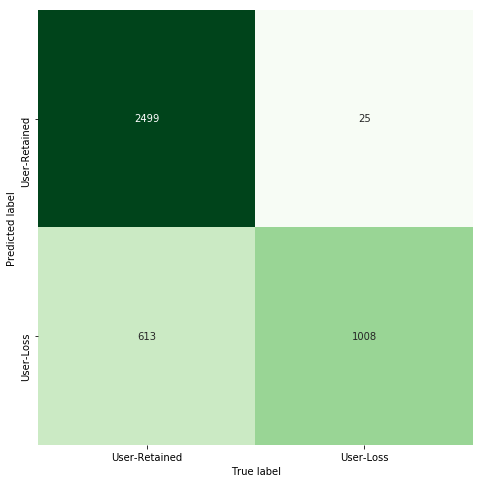

In [27]:
#visualize model predictions:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['User-Retained', 'User-Loss'],
            yticklabels=['User-Retained', 'User-Loss'], cmap="Greens")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [28]:
# take a look at the top features
coefs=logreg.coef_[0]
top_three = np.argpartition(coefs, -3)[-3:]
print(data.columns[top_three])

Index(['weekday_pct', 'ultimate_black_user', 'trips_in_first_30_days'], dtype='object')


The model works best when predicting user that will be lossed which is iin with our goal. The strongest predictors of retention are 'weekday_pct', 'ultimate_black_user', and 'trips_in_first_30_days'. Ultimate inc needs to focus on way to promote ridership during weekdays. For example, offering a incremental discount based on the number of rides taken in a week.  
* Recommendations
    * Increase incentive for taking rides during the weekdays. User who have a higher weekday precentage are more likely to be retained.
    * Promote usage of Ultimate Black.
    
    